In [2]:
pip install pennylane --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 35.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt


**1. ReadXanaduQuantumCodebookI.3Tutorialandcomplete3exercises. (3points)** https://codebook.xanadu.ai/I.3


*   List item
*   List item


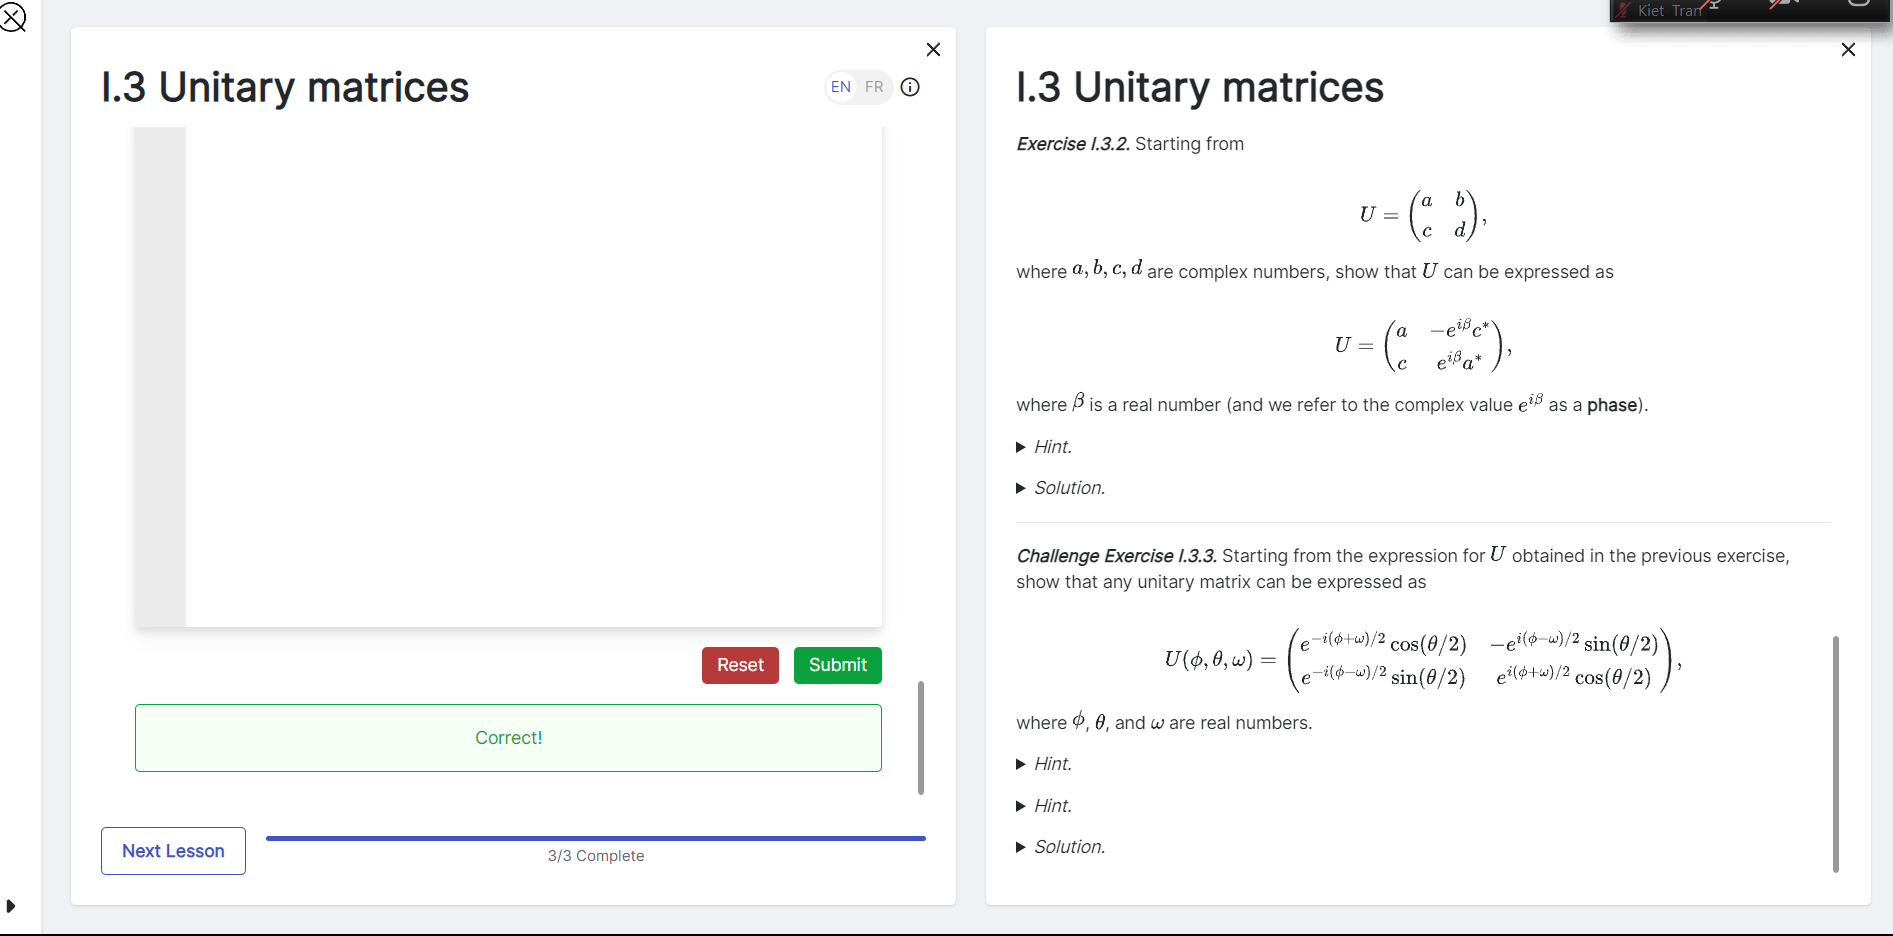

Codercise I.3.1. Complete the quantum function below to create a circuit that applies U to the qubit and returns its state. (Compare this to the earlier function apply_u that you wrote - isn't it nice to not have to worry about the matrix arithmetic?)

In [4]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT
    qml.QubitUnitary(U, wires=0)


    # Return the state
    return qml.state()


In [5]:
apply_u()

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

Codercise I.3.2. Apply the Rot operation to a qubit using the input parameters. Then, complete the QNode to return the quantum state vector, using qml.state().

In [6]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    qml.Rot(phi, theta, omega, wires=0)

    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()


In [7]:
phi, theta, omega = np.pi, np.pi, np.pi
apply_u_as_rot(phi, theta, omega)

tensor([-6.123234e-17-7.49879891e-33j,  1.000000e+00+0.00000000e+00j], requires_grad=True)

**2. ReadXanaduQuantumCodebookI.4Tutorialandcomplete4exercises. (4points)**
https://codebook.xanadu.ai/I.4

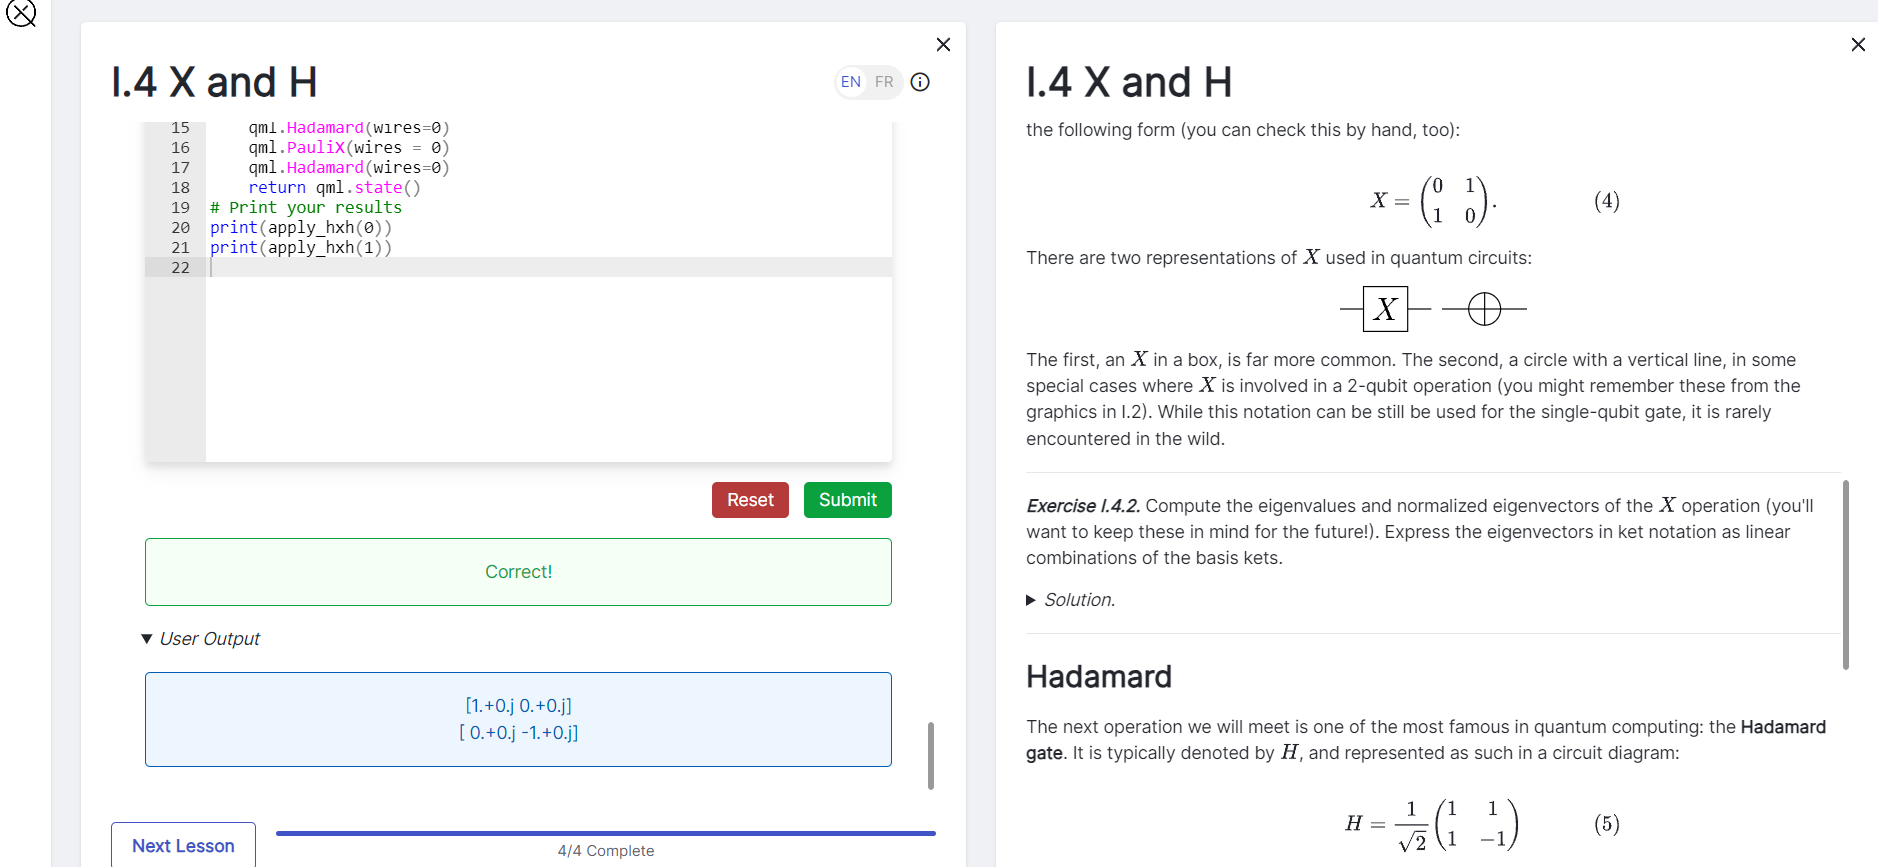

Codercise I.4.1. A common use of the  gate is in initializing the state of a qubit at the beginning of an algorithm. Quite often, we would like our qubits to start in state  (which is the default in PennyLane), however there are many cases where we instead would like to start from . Complete the function below by using qml.PauliX to initialize the qubit's state to  or  based on an input flag. Then, use qml.QubitUnitary to apply the provided U.

In [8]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER
    if state == 1:
      qml.PauliX(wires = 0)
    else:
      pass
    # APPLY U TO THE STATE
    qml.QubitUnitary(U, wires=0)

    return qml.state()


In [9]:
varied_initial_state(1), varied_initial_state(0)

(tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True),
 tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True))

Codercise I.4.2. What do you think is meant by uniform superposition? Let's explore this using PennyLane. Complete the quantum function below such that it:

applies a Hadamard gate to the qubit,
returns the state of the qubit with qml.state.


In [10]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE HADAMARD GATE
    qml.Hadamard(wires=0)
    # RETURN THE STATE
    return qml.state()


In [11]:
apply_hadamard()

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

Codercise I.4.3. Combining your code from codercises I.4.1, and I.4.2, apply the Hadamard gate to both |0> and |1>. What do the two different output states look like? Do you notice anything special about them?

In [12]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state
    if state == 1:
      qml.PauliX(wires = 0)
    else:
      pass
    # APPLY THE HADAMARD
    qml.Hadamard(wires=0)
    # RETURN THE STATE

    return qml.state()

print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))


[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


Codercise I.4.4. Now let's combine what we've just learned. Create a device with one qubit. Then, write a QNode (from scratch!) that applies the following circuit and returns the state.


Determine its effect on the two basis states. What do you think this operation does? (We'll discuss this further in the next node).

The signature of your function should be:

def apply_hxh(state):
    ...
    return qml.state()

where as in the previous exercises, state is an integer that indicates which basis state to prepare.

In [13]:
##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE
def apply_hxh(state):
    if state == 1:
      qml.PauliX(wires = 0)
    else:
      pass
    qml.Hadamard(wires=0)
    qml.PauliX(wires = 0)
    qml.Hadamard(wires=0)
    return qml.state()
# Print your results
print(apply_hxh(0))
print(apply_hxh(1))


[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


**3. ReadXanaduQuantumCodebookI.5Tutorialandcomplete5exercises. (5points)**  https://codebook.xanadu.ai/I.5
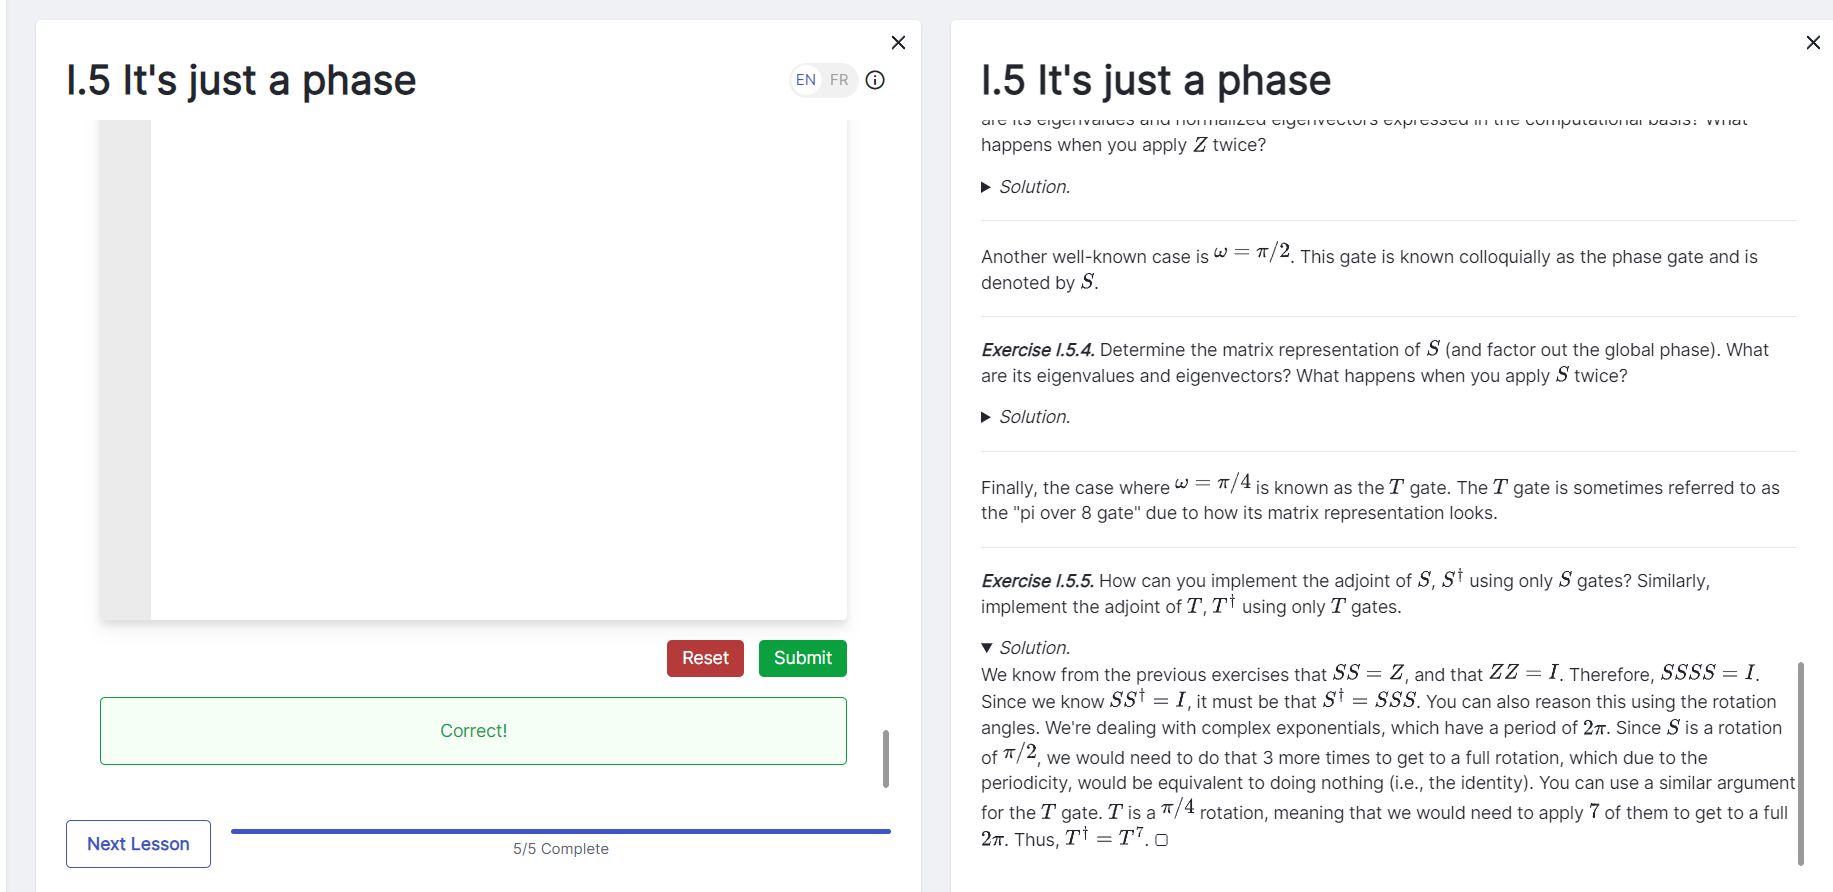

Codercise I.5.1. Write a QNode that applies qml.PauliZ to the |+> state and returns the state. What state is this? How do the measurement probabilities differ from those of |+> ?

In [14]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(wires = 0)
    # APPLY PAULI Z
    qml.PauliZ(wires=0)
    # RETURN THE STATE
    return qml.state()

print(apply_z_to_plus())


[ 0.70710678+0.j -0.70710678+0.j]


Codercise I.5.2. Write a QNode that uses qml.RZ to simulate a qml.PauliZ operation and return the state. Apply it to the |+> state to check your work.

In [15]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(wires=0)
    # APPLY RZ
    qml.RZ(np.pi, wires=0)
    # RETURN THE STATE
    return qml.state()

print(fake_z())

[4.32978028e-17-0.70710678j 4.32978028e-17+0.70710678j]


Codercise I.5.3. Adjoints in PennyLane can be computed by applying the qml.adjoint transform to an operation before specifying its parameters and wires. For example,

qml.adjoint(qml.RZ)(phi, wires=0)
performs the same computation as qml.RZ(-phi, wires=0). Implement the circuit below, using adjoints when necessary, and return the quantum state.

In [16]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.adjoint(qml.T)(wires=0)
    qml.RZ(0.3, wires=0)
    qml.adjoint(qml.S)(wires=0)
    # RETURN THE STATE

    return qml.state()
many_rotations()

tensor([0.69916673-0.10566872j, 0.56910461-0.41966647j], requires_grad=True)

Codercise I.5.4. The  gate plays an important role in more advanced quantum computing topics; specifically, it is a required operation in some fault-tolerant frameworks. However, it is much more resource intensive to implement in those frameworks than other gates, and therefore a common task in quantum circuit design is minimization of the -count and -depth (i.e., the number of layers of depth in a circuit which contain a /). Many such tools for optimizing quantum circuits are automated, however we can work out a simple example by hand. Suppose that we want to implement the following circuit:


That’s an awful lot of s! Implement this same circuit in PennyLane as a QNode just_enough_ts, but minimize the number of  gates by replacing sequences of them with other gates that have the same effect. Using the gates you learned before, how much can you simplify this circuit?

Then, answer the following questions:

What are the original -count, -depth, and regular depth?
What is the optimal -count?
What are the optimal depth and -depth of the resulting circuit?
Record your answers in the variables provided in the code block below. Note: You can only use , , and  gates!

Tip. Recall that operations can be applied to different qubits by specifying the desired index in the wires variable. Also, circuit depth is calculated as the maximum number of gates acting on any one wire.

In [17]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def too_many_ts():
    """You can implement the original circuit here as well, it may help you with
    testing to ensure that the circuits have the same effect.

    Returns:
        array[float]: The measurement outcome probabilities.
    """

    return qml.probs(wires=[0, 1, 2])

@qml.qnode(dev)
def just_enough_ts():
    """Implement an equivalent circuit as the above with the minimum number of
    T and T^\dagger gates required.

    Returns:
        array[float]: The measurement outcome probabilities.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.Hadamard(wires = 2)

    qml.S(wires=0)
    qml.T(wires = 1)
    qml.adjoint(qml.T)(wires=2)

    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.Hadamard(wires = 2)

    qml.adjoint(qml.S)(wires=0)
    qml.PauliZ(wires=1)
    qml.adjoint(qml.S)(wires=2)
    qml.adjoint(qml.T)(wires=2)

    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.Hadamard(wires = 2)
    # IMPLEMENT THE CIRCUIT, BUT COMBINE AND OPTIMIZE THE GATES
    # TO MINIMIZE THE NUMBER OF TS

    return qml.probs(wires=[0, 1, 2])

##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT VALUES FOR THE ORIGINAL CIRCUIT
original_depth = 8
original_t_count = 13
original_t_depth = 6

# FILL IN THE CORRECT VALUES FOR THE NEW, OPTIMIZED CIRCUIT
optimal_depth = 6
optimal_t_count = 3
optimal_t_depth = 2

print(just_enough_ts())

[0.    0.    0.    0.    0.375 0.125 0.375 0.125]


**4. ReadXanaduQuantumCodebookI.6Tutorialandcomplete4exercises. (4points)** https://codebook.xanadu.ai/I.6
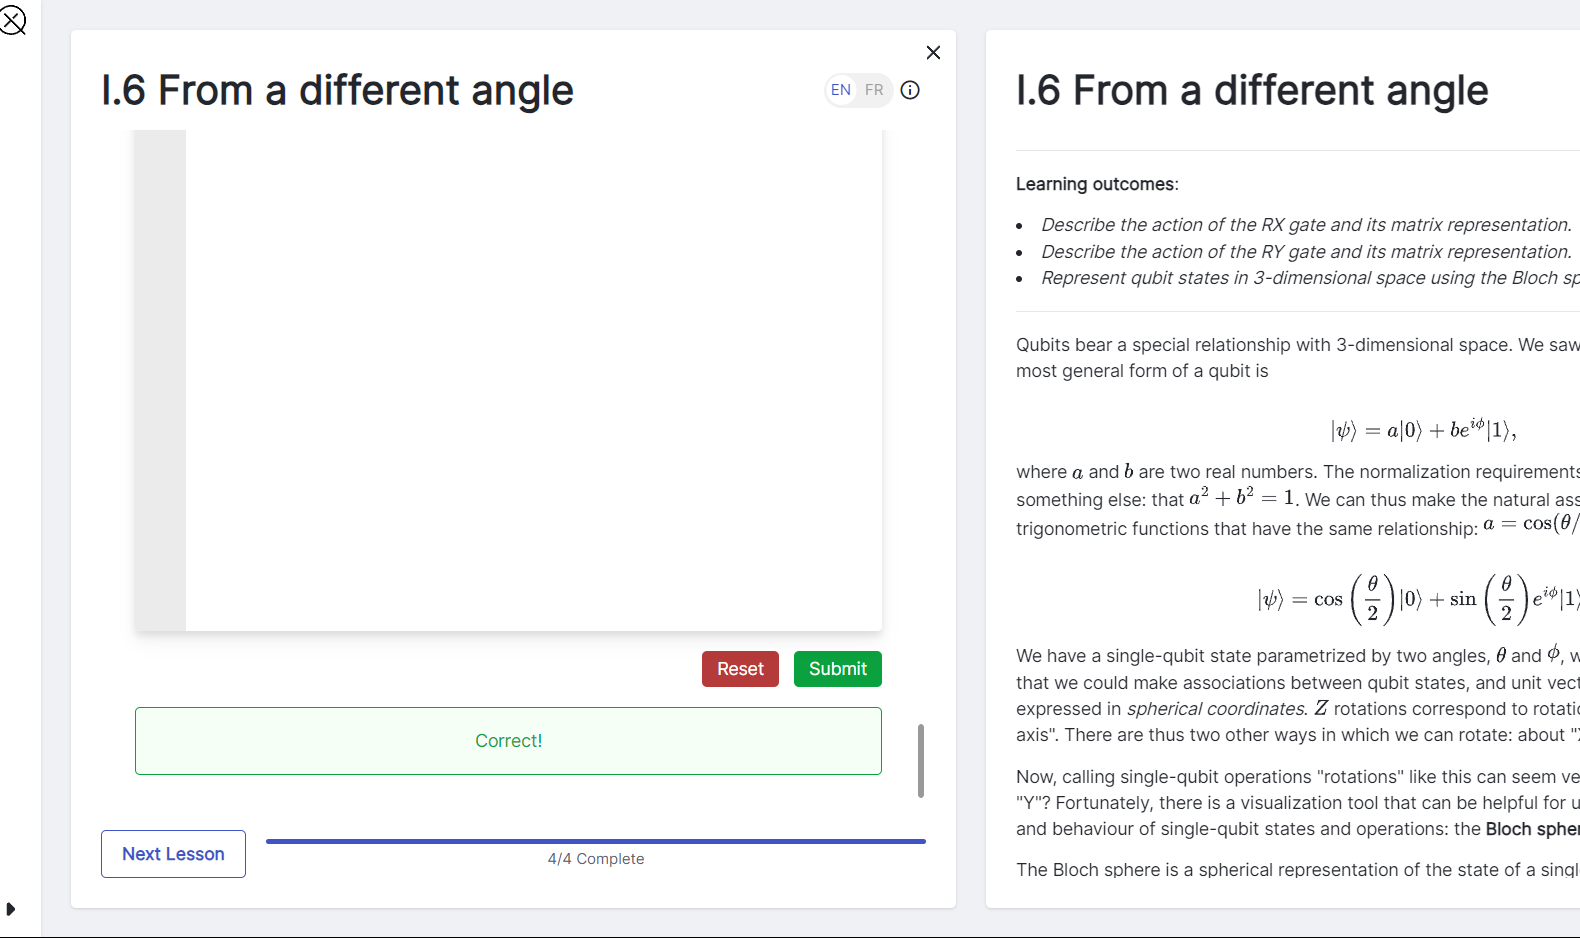

Codercise I.6.1. Write a QNode that applies qml.RX with an angle of  to one of the computational basis states. What operation is this?

In [18]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi, wires = 0)
    return qml.state()

print(apply_rx_pi(0))
print(apply_rx_pi(1))


[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


Codercise I.6.2. The matrix representation of  is

How does this affect the amplitudes when we apply it to a quantum state? Implement a QNode that applies the qml.RX operation with parameter  to a specified basis state. Then, run the code to plot the amplitudes of the  and  after applying  to the  state.



/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


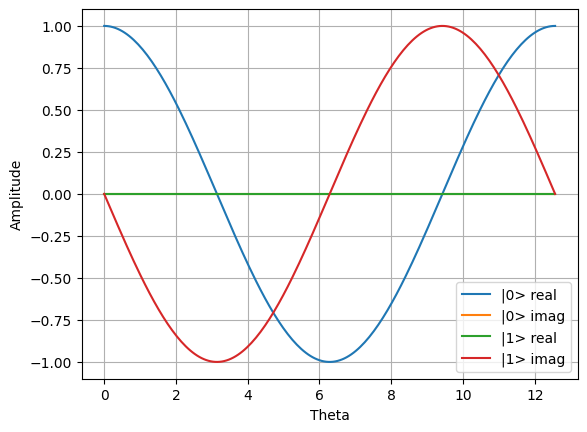

In [34]:
dev = qml.device('default.qubit', wires=1)
import matplotlib.pyplot as plt

def plotter(x, y):
  plt.plot(x, y.T[0], label = "|0> real")
  plt.plot(x, np.imag(y.T[0]), label = "|0> imag")
  plt.plot(x, y.T[1], label = "|1> real")
  plt.plot(x, np.imag(y.T[1]), label = "|1> imag")
  plt.xlabel("Theta")
  plt.ylabel("Amplitude")
  plt.legend()
  plt.grid()
  plt.show()

@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta, wires = 0)
    return qml.state()

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

plot = plotter(angles, output_states)


Codercise I.6.3. Repeat the above exercise, but using qml.RY. From the amplitudes you obtain for , can you start deducing the matrix form of ?

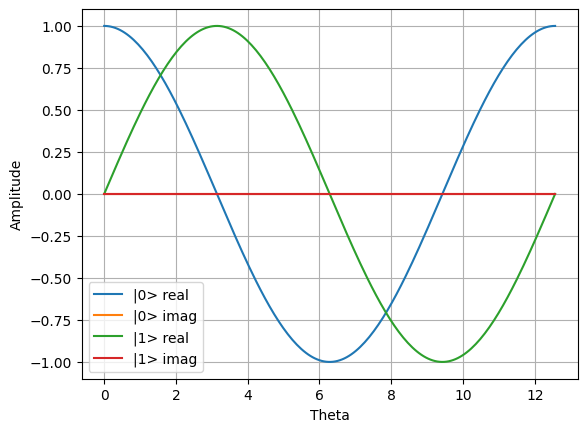

In [35]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta, wires=0)
    return qml.state()

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

plot = plotter(angles, output_states)
